In [1]:
#seed
import random
import numpy as np
np.random.seed(42)
random.seed(42)

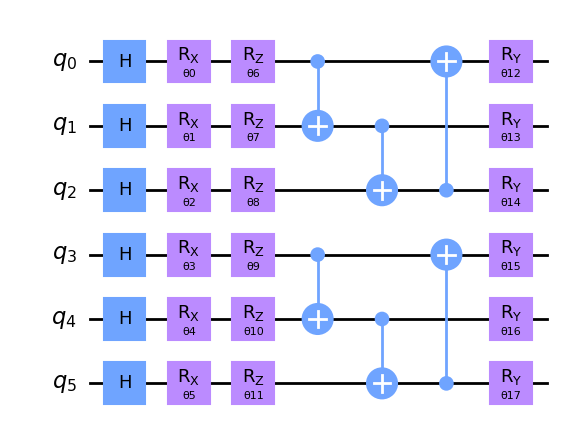

In [1]:
import qiskit
import qleet
tc=qiskit.QuantumCircuit(6)
params= [qiskit.circuit.Parameter(f"θ{i}") for i in range(18)]
for i in range(6):
    tc.h(i)
    tc.rx(params[i], i)
for i in range(6):
    tc.rz(params[i+6], i)
tc.cnot(0,1)
tc.cnot(1,2)
tc.cnot(2,0)
tc.cnot(3,4)
tc.cnot(4,5)
tc.cnot(5,3)

for i in range(6):
    tc.ry(params[i+12], i)

tc.draw("mpl")


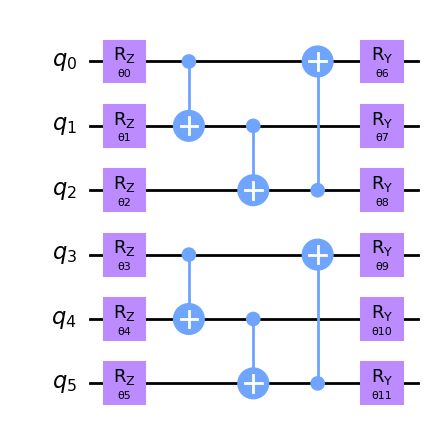

In [1]:
import qiskit
import qleet
tc=qiskit.QuantumCircuit(6)
params= [qiskit.circuit.Parameter(f"θ{i}") for i in range(12)]
for i in range(6):
    tc.rz(params[i], i)
tc.cnot(0,1)
tc.cnot(1,2)
tc.cnot(2,0)
tc.cnot(3,4)
tc.cnot(4,5)
tc.cnot(5,3)

for i in range(6):
    tc.ry(params[i+6], i)

tc.draw("mpl")


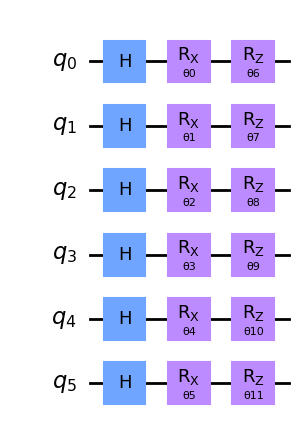

In [1]:
import qiskit
import qleet
tc=qiskit.QuantumCircuit(6)
params= [qiskit.circuit.Parameter(f"θ{i}") for i in range(12)]
for i in range(6):
    tc.h(i)
    tc.rx(params[i], i)
for i in range(6):
    tc.rz(params[i+6], i)

tc.draw("mpl")


In [2]:
qiskit_descriptor = qleet.interface.circuit.CircuitDescriptor(
    circuit=tc, params=params, cost_function=None
)

qiskit_expressibility = qleet.analyzers.expressibility.Expressibility(  
    qiskit_descriptor, samples=1000
)

expr_jsd = qiskit_expressibility.expressibility("jsd")
expr_jsd

0.5513411085051468

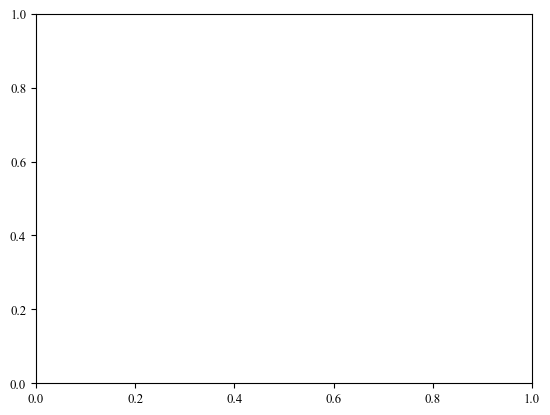

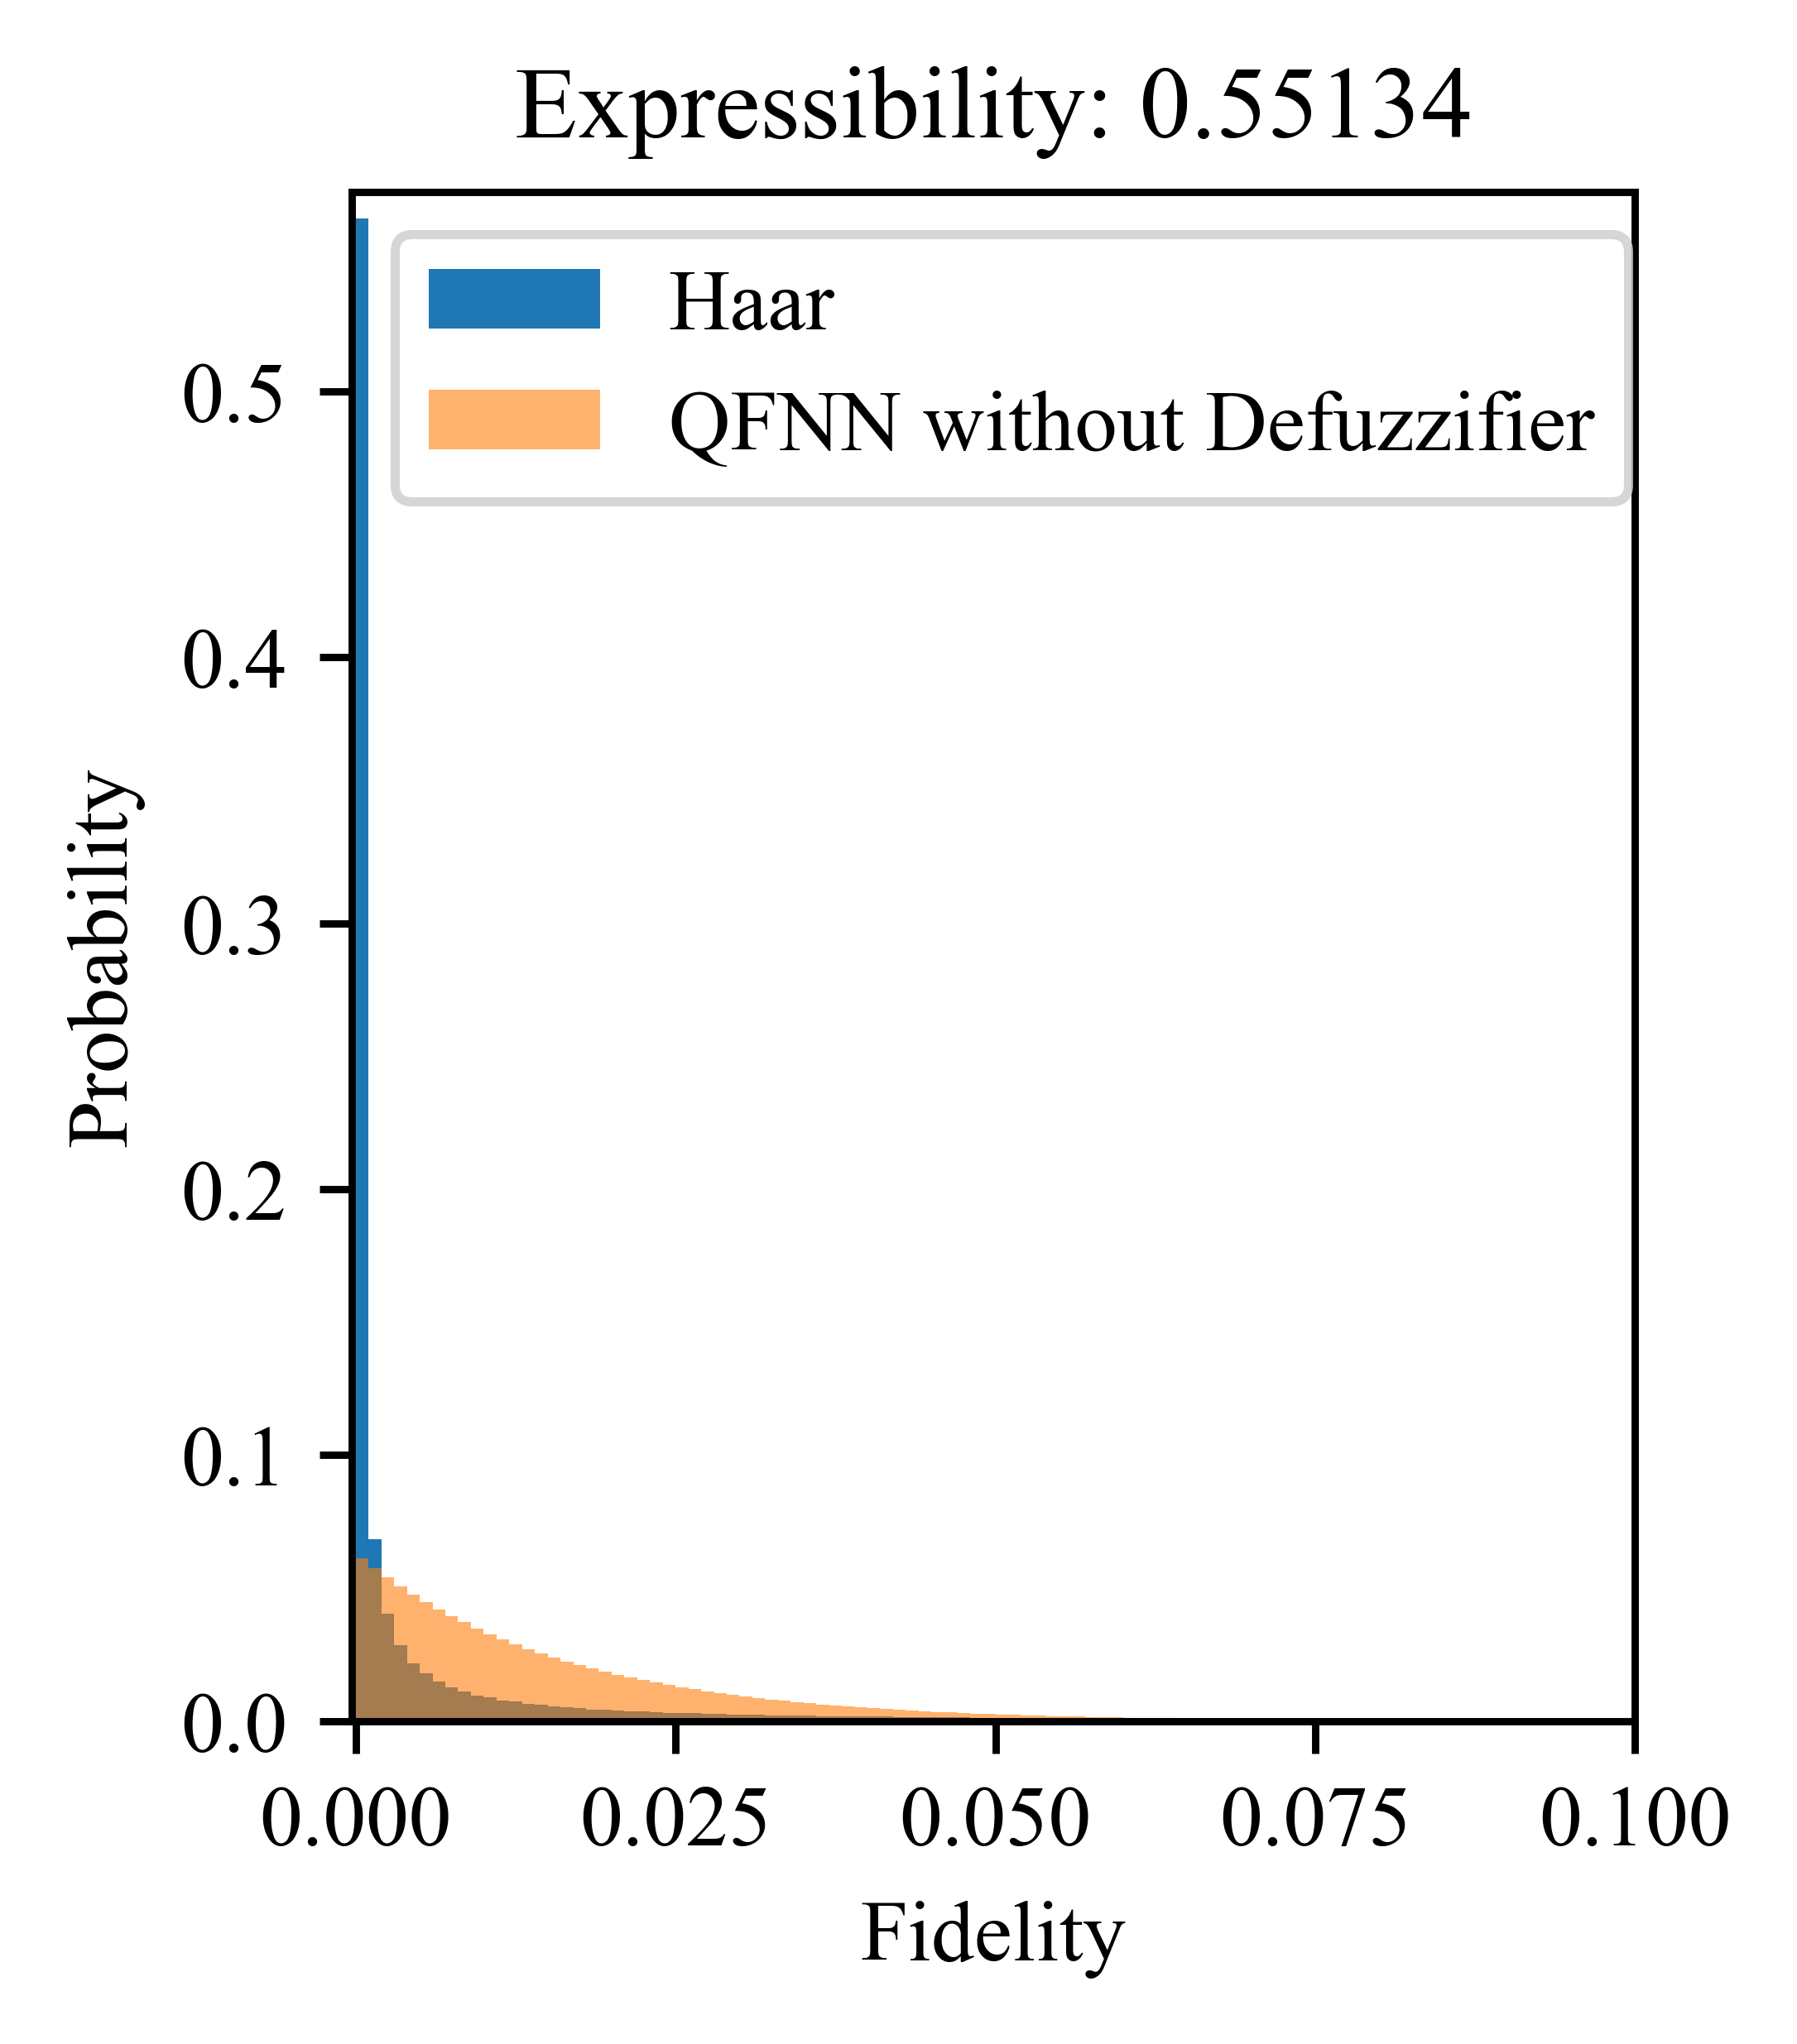

In [3]:
import numpy as np
pqc_prob_qcnn=qiskit_expressibility.plot_data[0][:250]
haar_prob=qiskit_expressibility.plot_data[1][:250]
bin_edges=qiskit_expressibility.plot_data[2][:251]

import matplotlib.pyplot as plt

plt.clf()

plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['font.size'] = 9.3

plt.grid(False)

plt.figure(figsize=(2.5,3), dpi=800)

expr = expr_jsd

bin_middles = (bin_edges[1:] + bin_edges[:-1]) / 2.0
bin_width = bin_edges[1] - bin_edges[0]
plt.bar(bin_middles, haar_prob, width=bin_width, label="Haar")

plt.bar(bin_middles, pqc_prob_qcnn, width=bin_width, label="QFNN without Defuzzifier", alpha=0.6)

plt.xlim((-0.0003, 0.1 ))
plt.ylim(bottom=0.0, top=max(max(pqc_prob_qcnn), max(haar_prob)) + 0.01)
plt.title(f"Expressibility: {np.round(expr,5)}")
plt.xlabel("Fidelity")
plt.ylabel("Probability")
plt.legend()
plt.show()
